# EMSE 6992 Assignment 4 #
**Maddie Warndorf**
**4/17/19**

## Question 1 ##

In [1]:
import pandas as pd

from sklearn.utils import shuffle


df = pd.read_csv('tw_text_drive.csv', sep = ',')
df = shuffle(df)


In [2]:
#Cleaning full dataframe and recoding emoji's as :emoji expression:
from bs4 import BeautifulSoup
import emoji


def tweet_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False

for index, row in df.iterrows():
    text = row['text']
    cleaned_text = BeautifulSoup(text, 'lxml')
    bstext = cleaned_text.get_text()
    if tweet_has_emoji(bstext):
        real_text = emoji.demojize(bstext)
    else:
        real_text = bstext
    row["text"] = real_text



In [6]:
'''PLEASE DO NOT RE-RUN THIS!'''
#Randomly selecting 1,000 tweets to be used as real dataset
real_dataset = df.sample(1000)
real_dataset.to_csv('txt_driving_real.csv',index=False, sep=',',encoding='utf-8')
#real_dataset = pd.read_csv('txt_driving_real.csv', sep = ',')

## Question 3 ##
Making csv file to be annotated in MTurk.

In [7]:
rdf = pd.read_csv('txt_driving_real.csv', sep = ',')
rdf = shuffle(rdf)

#Adding in Attention Checkers
ac_df = pd.read_csv('Attention Checkers.csv', sep = ',')
#print(ac_df.head())
full = [rdf, ac_df]
full_dataset = pd.concat(full)
print(full_dataset.head())
full_dataset = shuffle(full_dataset)
print(len(full_dataset))
full_dataset.to_csv('txt_driving_withAC.csv',index=False, sep=',',encoding='utf-8')

                       id                                               text
593  1112352972548263936e  I be texting a driving and shit and people nex...
719  1113068488090882048w  RT @ForsythCountySO: April is National Distrac...
170  1113228360052817921j  RT @gogelauto: N.J.'s texting-while-driving ti...
818  1113027566699511808e  RT @TheOaklandPress: Police to increase textin...
470  1113931840543498241c  April is National Distracted Driving Awareness...
1015


## Question 4 ##
Distribution of 100 GOLD HITs and 150 GOLD HITs

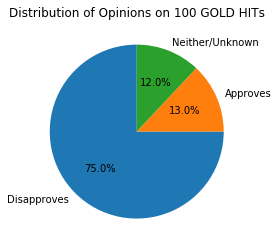

In [4]:
#rdf = shuffle(rdf)
#randomly selecting 100 to annotate 
"""PLEASE KEEP THESE COMMENTED OUT IF YOU ARE GOING TO RUN THIS"""
#sample100 = rdf.sample(100)
#sample100.to_csv('GOLD_Hits.csv',index=False, sep=',',encoding='utf-8')
"""The 100 GOLD HITs were annotated in Excel.
Visualizing the Distribution of annotations:"""

import matplotlib.pyplot as plt
gldf100 = pd.read_csv('Gold_Hits_Annotated.csv', sep = ',')

columns = ['id','classification']
id_class_df100 = gldf100[columns]


disapproves_total = 0
approves_total = 0
neither_unknown_total = 0
for index, row in id_class_df100.iterrows():
    if row['classification'] == "Disapproves":
        disapproves_total += 1
    elif row['classification'] == "Approves":
        approves_total += 1
    else:
        neither_unknown_total += 1
        
opinions = ["Disapproves", "Approves", "Neither/Unknown"]
totals = [disapproves_total, approves_total, neither_unknown_total]

plt.pie(totals, labels=opinions, startangle=90, autopct='%.1f%%')
plt.title("Distribution of Opinions on 100 GOLD HITs")
plt.show()

**PLEASE DO NOT RE-RUN THIS SECTION**

In [10]:
"""PLEASE DO NOT RE-RUN THIS SECTION'''

Adding an additional 50 to GOLD HITs."""
rdf = shuffle(rdf)
sample50 = rdf.sample(55)

samples = [sample100, sample50]
gold_samples = pd.concat(samples)
unique_df = gold_samples.drop_duplicates()

#to make sure it is 150.
print(len(unique_df))
unique_df.to_csv('Gold_Hits150.csv',index=False, sep=',',encoding='utf-8')


150


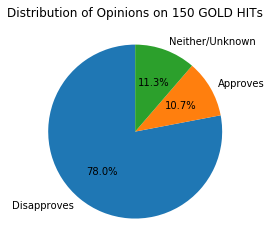

In [5]:
"""The 50 additional GOLD HITs were annotated in Excel.
Visualizing the Distribution of annotations:"""

gldf150 = pd.read_csv('Gold_Hits150_Annotated.csv', sep = ',')

columns = ['id','classification']
id_class_df150 = gldf150[columns]


disapproves_total = 0
approves_total = 0
neither_unknown_total = 0
for index, row in id_class_df150.iterrows():
    if row['classification'] == "Disapproves":
        disapproves_total += 1
    elif row['classification'] == "Approves":
        approves_total += 1
    else:
        neither_unknown_total += 1
        
opinions = ["Disapproves", "Approves", "Neither/Unknown"]
totals = [disapproves_total, approves_total, neither_unknown_total]

plt.pie(totals, labels=opinions, startangle=90, autopct='%.1f%%')
plt.title("Distribution of Opinions on 150 GOLD HITs")
plt.show()

## Question 5 ##
Creating a way to see if it is a GOLD HIT or not

In [6]:
gldf = pd.read_csv('Gold_Hits150_Annotated.csv', sep = ',')
#print(gldf.head())
columns = ['id','classification']
id_class_df = gldf[columns]
#print(id)

gold_hits_dict = {}
gold_hit_ids = []
for index, row in id_class_df.iterrows():
    gold_hit_ids.append(row['id'])
    gold_hits_dict[row['id']] = row['classification']
#print(gold_hits_dict)

**Function to clean the csv file from MTurk**

In [7]:
#Function to clean the csv file from MTurk
def mturk_dataframe_cleaned(df):
    columns = ["WorkerId","WorkTimeInSeconds","Input.id","Input.text","Answer.taskAnswers"]
    columns_mturk = ["WorkerId","WorkTimeInSeconds","Input.id","Input.text"]
    mturk_gh_data1 = df[columns]
    mturk_df = df[columns_mturk]
    classifications = []
    for index, row in mturk_gh_data1.iterrows():
        classification = row["Answer.taskAnswers"][29:]
        answer = classification[:-4]
        classifications.append(answer)
    mturk_df['classification'] = classifications
    return(mturk_df)

**Finding if it refers to a GOLD HIT and if it was classified correctly**

In [8]:
mturk_gh = pd.read_csv('Gold_Hit_MTurk_Batch_Results.csv', sep = ',')
#print(mturk_gh.head())

mturk_gh_df = mturk_dataframe_cleaned(mturk_gh)

def gold_hit_check_dict(df_from_mturk):
    df = df_from_mturk
    mturk_gh_dict = {}
    for index, row in df.iterrows():
        if row["Input.id"] in gold_hit_ids:
            mturk_gh_dict[row["Input.id"]] = row["classification"]
        else:
            continue
    return(mturk_gh_dict)

    
mturk_gh_dict = gold_hit_check_dict(mturk_gh_df)


def gh_classification_check(mturk_dict):
    correctly_classified = {key: mturk_dict[key] for key in mturk_dict if key in gold_hits_dict and mturk_dict[key] == gold_hits_dict[key]}
    print("The number of correctly classified HITs based on GOLD HITs: %d" % len(correctly_classified))
    incorrectly_classified = {key: mturk_dict[key] for key in mturk_dict if key in gold_hits_dict and mturk_dict[key] != gold_hits_dict[key]}
    print("The number of incorrectly classified HITs based on GOLD HITs: %d" % len(incorrectly_classified))
    print(incorrectly_classified)


gh_classification_check(mturk_gh_dict)


The number of correctly classified HITs based on GOLD HITs: 136
The number of incorrectly classified HITs based on GOLD HITs: 14
{'1113183519688278016g': 'Approves', '1114027595950170112i': 'Disapproves', '1112791900329791495v': 'Approves', '1115404031604789248j': 'Approves', '1115372212117176321j': 'Disapproves', '1113464541394894854y': 'Disapproves', '1113210646403977217p': 'Neither/Unknown', '1113874524448219136c': 'Disapproves', '1114458316997124097i': 'Disapproves', '1113530536172118021c': 'Approves', '1113602595766116359l': 'Disapproves', '1115083378670358528a': 'Disapproves', '1113713952125607937u': 'Disapproves', '1113144851350999040m': 'Disapproves'}


/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


## Question 6 ##
Accuracy of a given annotator and measure of time

**Accuracy of a given annotator**

In [9]:
#MEASURING ACCURACY
def gh_accuracy_check(workerId, df_from_mturk):
    df = df_from_mturk
    worker_df = df[df.WorkerId == workerId]
    worker_gh_dict = gold_hit_check_dict(worker_df)
    if len(worker_gh_dict) == 0:
        print("This worker did not classify any GOLD HITs.")
        #this is so that when it is checked it will not flag warning
        accuracy = 1
    else:
        correctly_classified = {key: worker_gh_dict[key] for key in worker_gh_dict if key in gold_hits_dict and worker_gh_dict[key] == gold_hits_dict[key]}
        total_correct = len(correctly_classified)
        total_predictions = len(worker_gh_dict)
        accuracy = total_correct/total_predictions
    return(accuracy)
        
        
accuracy = gh_accuracy_check("ARUVZL9T2O9I9", mturk_gh_df)       
        
print('Accuracy of worker %s Gold HITs: %.4f' % ("ARUVZL9T2O9I9", accuracy))     




Accuracy of worker ARUVZL9T2O9I9 Gold HITs: 0.9067


**Finding average time**

Average time per HIT: 8.99 seconds
Estimated total hours needed: 2.54


Text(0.5, 1.0, 'Distribution of Time Spent on Each HIT')

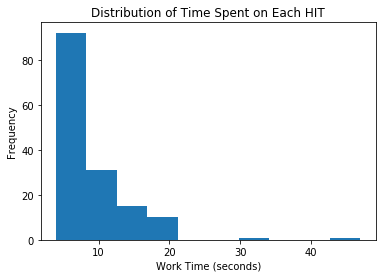

In [10]:
#average time
import numpy as np
hit_timing = mturk_gh['WorkTimeInSeconds']
avg_time = np.mean(hit_timing)
print('Average time per HIT: %.2f seconds' % avg_time)

#Number of HITs to go through is 1,015
total_seconds_needed = 1015 * 9
estimated_hours = (total_seconds_needed/60)/60
print("Estimated total hours needed: %.2f" % estimated_hours)

mturk_gh['WorkTimeInSeconds'].plot(kind='hist')
plt.xlabel('Work Time (seconds)')
plt.title('Distribution of Time Spent on Each HIT')

## Question 7/9 ##
identifying cheaters

In [376]:
#REMEMBER THAT THE DATASET THAT WILL BE INSERTED IS 'txt_driving_withAC.csv'

In [11]:
#Checking Attention Checkers was done in the csv file and the ones that failed were added to the failed_workers list


responses_df = pd.read_csv('Batch_3606811_batch_results.csv', sep = ',')

mturk_df = mturk_dataframe_cleaned(responses_df)
unique_workerids = np.unique(list(mturk_df["WorkerId"]))
print(len(unique_workerids))


def worker_cheating_check(workerId):
    print("____Information on %s_____" % workerId)
    #This list is the list of workers that failed an Attention Checker:
    failed_workers = ["A12SALDGX9429J","A13YH9YNHZXBJE","A1EML2S07HJMH7","A1PBE0H6PNJIRO","A1XPNXTMCXVGDT","A25J3BIDQ7GW9I",
                     "A301X9EE0SXTYL","A3G1W17JD33POP","A3NOXFQNEWTIDF","A3O1I9MATO3ZZN","A3W0C04EXOY12C","A9HVFM0YUY00Q","AVR6OLSOLDVGE"]
    if workerId in failed_workers:
        print("This worker failed an attention checker.")

    #Distribution check
    disapproves = 0
    approves = 0
    neither_unknown = 0
    for index, row in mturk_df.iterrows():
        if row['WorkerId'] == workerId:
            if row['classification'] == "Disapproves":
                disapproves += 1
            elif row['classification'] == "Approves":
                approves += 1
            else:
                neither_unknown += 1
        else:
            continue
    total_hits_classified = disapproves + approves + neither_unknown
    
    print("Total number of HITs classified by %s: %f" % (workerId, total_hits_classified))
    if approves > disapproves:
        print("%s may be a cheater. Approves > Disapproves." % workerId)

    
    #Timing in Seconds Check
    over_100seconds = 0
    over_25seconds = 0
    under_5seconds = 0
    for index, row in mturk_df.iterrows():
        if row['WorkerId'] == workerId:
            if row['WorkTimeInSeconds'] > 100:
                over_100seconds += 1
                over_25seconds += 1
            elif row['WorkTimeInSeconds'] > 25:
                over_25seconds += 1
            else:
                if row['WorkTimeInSeconds'] < 5:
                    under_5seconds += 1
                else:
                    continue
        else:
            continue
    #Check worker if half of the HITs took over 25
    half_thc = total_hits_classified/2
    if over_25seconds > half_thc:
        print("%s may be a cheater. Half of their HITs took longer than 25 seconds." % workerId)

    if under_5seconds > 0:
        print("%s may be a cheater. One or more of their HITs is under 5 seconds." % workerId)
    
    if over_100seconds > 0:
        print("%s may be a cheater. One or more of their HITs is over 100 seconds." % workerId)
    
    #GOLD HIT Check (Warn if accuracy below 50%)
    worker_accuracy = gh_accuracy_check(workerId, mturk_df)    
    if worker_accuracy < 0.50:
        print("%s may be a cheater. Accuracy below 0.50." % workerId)
    






105


/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [19]:
for workerId in unique_workerids:
    worker_cheating_check(workerId)

____Information on A12SALDGX9429J_____
This worker failed an attention checker.
Total number of HITs classified by A12SALDGX9429J: 177.000000
A12SALDGX9429J may be a cheater. Approves > Disapproves.
A12SALDGX9429J may be a cheater. One or more of their HITs is under 5 seconds.
A12SALDGX9429J may be a cheater. Accuracy below 0.50.
____Information on A13O5S4PPBN7X7_____
Total number of HITs classified by A13O5S4PPBN7X7: 13.000000
A13O5S4PPBN7X7 may be a cheater. Approves > Disapproves.
A13O5S4PPBN7X7 may be a cheater. Half of their HITs took longer than 25 seconds.
A13O5S4PPBN7X7 may be a cheater. Accuracy below 0.50.
____Information on A13YH9YNHZXBJE_____
This worker failed an attention checker.
Total number of HITs classified by A13YH9YNHZXBJE: 73.000000
A13YH9YNHZXBJE may be a cheater. Approves > Disapproves.
A13YH9YNHZXBJE may be a cheater. One or more of their HITs is over 100 seconds.
____Information on A150BOXII7BKNP_____
Total number of HITs classified by A150BOXII7BKNP: 44.00000

This worker did not classify any GOLD HITs.
____Information on A2IYD10LBEH6AT_____
Total number of HITs classified by A2IYD10LBEH6AT: 66.000000
A2IYD10LBEH6AT may be a cheater. One or more of their HITs is under 5 seconds.
____Information on A2K0JQDTZ0DAE1_____
Total number of HITs classified by A2K0JQDTZ0DAE1: 2.000000
A2K0JQDTZ0DAE1 may be a cheater. Half of their HITs took longer than 25 seconds.
A2K0JQDTZ0DAE1 may be a cheater. One or more of their HITs is over 100 seconds.
This worker did not classify any GOLD HITs.
____Information on A2LSOA4PV13MEX_____
Total number of HITs classified by A2LSOA4PV13MEX: 1.000000
A2LSOA4PV13MEX may be a cheater. Half of their HITs took longer than 25 seconds.
This worker did not classify any GOLD HITs.
____Information on A2LV5432PV1S39_____
Total number of HITs classified by A2LV5432PV1S39: 1.000000
This worker did not classify any GOLD HITs.
____Information on A2MCG5W6LHSRG9_____
Total number of HITs classified by A2MCG5W6LHSRG9: 35.000000
A2MCG5

Total number of HITs classified by A3V8LIMUUJWUTL: 40.000000
A3V8LIMUUJWUTL may be a cheater. One or more of their HITs is under 5 seconds.
A3V8LIMUUJWUTL may be a cheater. One or more of their HITs is over 100 seconds.
____Information on A3VFUS2T5TFFJ4_____
Total number of HITs classified by A3VFUS2T5TFFJ4: 14.000000
____Information on A3VUAZ3YQEKFQL_____
Total number of HITs classified by A3VUAZ3YQEKFQL: 27.000000
____Information on A3W0C04EXOY12C_____
This worker failed an attention checker.
Total number of HITs classified by A3W0C04EXOY12C: 100.000000
A3W0C04EXOY12C may be a cheater. Approves > Disapproves.
A3W0C04EXOY12C may be a cheater. Accuracy below 0.50.
____Information on A98HE8E746V49_____
Total number of HITs classified by A98HE8E746V49: 30.000000
____Information on A9HVFM0YUY00Q_____
This worker failed an attention checker.
Total number of HITs classified by A9HVFM0YUY00Q: 34.000000
A9HVFM0YUY00Q may be a cheater. One or more of their HITs is under 5 seconds.
____Informat

## Cleaning Final MTurk csv ##
Remove rejected cheater HITs and run it through mturk_dataframe_cleaned()

In [12]:
final_mturk_pulldf = pd.read_csv('Batch_3606811_batch_results (3) Finalized.csv', sep = ',')

all_approved_df = final_mturk_pulldf[final_mturk_pulldf.Approved == 1]

final_df = mturk_dataframe_cleaned(all_approved_df)

#saving cleaned df
final_df.to_csv('Cleaned_Final_MTurk_Results.csv',index=False, sep=',',encoding='utf-8')

print(final_df.head())



         WorkerId  WorkTimeInSeconds              Input.id  \
0  A298J6JKK4Q2XN                118  1115731374495928320e   
1   A2Y5EUOYW8TXX                  5  1115731374495928320e   
2   ATCRNOBE8FX70                  8  1115731374495928320e   
3  A3PVHICLVK2UFJ                555  1113204488922370048g   
4  A1M7RANL73X0V6                  7  1113204488922370048g   

                                          Input.text classification  
0  So far I’ve seen someone driving while texting...    Disapproves  
1  So far I’ve seen someone driving while texting...    Disapproves  
2  So far I’ve seen someone driving while texting...       Approves  
3  Everyone knows that texting and #driving is a ...    Disapproves  
4  Everyone knows that texting and #driving is a ...    Disapproves  


/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


## Question 10 ##
Descriptive Statistics

Average time per HIT: 139.54 seconds
count    3045.000000
mean      139.535632
std       602.014709
min         3.000000
25%         7.000000
50%        11.000000
75%        38.000000
max      5567.000000
Name: WorkTimeInSeconds, dtype: float64


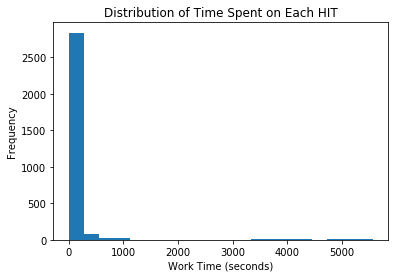

In [21]:
#AVERAGE TIME PER HIT
hit_timing = final_df['WorkTimeInSeconds']
avg_time = np.mean(hit_timing)
print('Average time per HIT: %.2f seconds' % avg_time)

final_df['WorkTimeInSeconds'].plot(kind='hist', bins=20)
plt.xlabel('Work Time (seconds)')
plt.title('Distribution of Time Spent on Each HIT')

#The additional 2 HITs that were added to the total were due to an accidental rejection and the worker let me know.
print(final_df.WorkTimeInSeconds.describe())




In [22]:
#Worker Statistics
print(final_df.WorkerId.describe())
#The worker with the most HITs completed/approved is A3PVHICLVK2UFJ with 190.

final_df["WorkerId"].value_counts()

count               3045
unique               125
top       A3PVHICLVK2UFJ
freq                 190
Name: WorkerId, dtype: object


A3PVHICLVK2UFJ    190
A298J6JKK4Q2XN    136
A12SALDGX9429J    122
AF2FQOM5UUWT2     103
A3O1I9MATO3ZZN     98
A1M7RANL73X0V6     79
A24XMHEZOPBHNI     67
A2IYD10LBEH6AT     66
A2Y5EUOYW8TXX      62
A1PBE0H6PNJIRO     60
A13YH9YNHZXBJE     59
A3NOXFQNEWTIDF     58
AZACNY1H74YWS      57
A1EML2S07HJMH7     56
A1MEEY4M9GP8BX     53
A301X9EE0SXTYL     52
A1YSYI926BBOHW     49
A1XPNXTMCXVGDT     48
AW5CAVAQBYOLE      48
A1Z1183AHI3WAR     47
A3OZ2T19XDQ954     45
A150BOXII7BKNP     44
AZCF208ZGXD9R      44
A3V8KGKKM5ZDH0     42
A3V8LIMUUJWUTL     40
A349TSPKFHIWE1     39
A1RVHVBAPXNKLM     38
A323GGQJ8EG2QH     35
A2MCG5W6LHSRG9     35
A3TTNGV1Y7ZZP7     35
                 ... 
AFPOIZWPP9ADN       3
A337MKRWW1YJSD      3
A3LCAFPHQMCEDV      3
A23XGAACQZNKQV      3
A1FD6H1KV9KQDQ      3
A1P7U2ULSAE7YL      3
A2K0JQDTZ0DAE1      2
ADJMZSRMFT3RG       2
A20WY925Z7YPH1      2
A22613LATQKY0C      2
AWMRNVE5YI1MY       2
A25J3BIDQ7GW9I      2
A15UR9T6I32Y2D      2
A2HGYNZ046TB9V      2
A2VRQML8Q3

In [23]:
#Time breakdown by worker
grouped = final_df.groupby('WorkerId').agg({"WorkTimeInSeconds":[np.mean, min, max]})
grouped.columns = ["_".join(c) for c in grouped.columns.ravel()]
grouped


,WorkTimeInSeconds_mean,WorkTimeInSeconds_min,WorkTimeInSeconds_max
WorkerId,,,
A12SALDGX9429J,9.491803,4,36
A13O5S4PPBN7X7,26.714286,8,50
A13YH9YNHZXBJE,33.016949,5,190
A150BOXII7BKNP,7.681818,5,28
A15UR9T6I32Y2D,7.000000,7,7
A15WCNO32MHBAF,16.000000,5,49
A18D67950RGJVL,13.677419,6,72
A1C8FN01981A69,30.291667,11,158
A1CMWDOYJULGVO,17.800000,9,29


**Frequency of annotations**

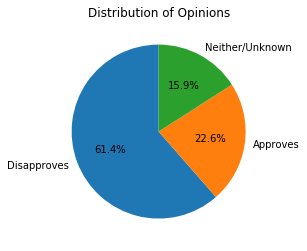

In [13]:
disapproves_total = 0
approves_total = 0
neither_unknown_total = 0
for index, row in final_df.iterrows():
    if row['classification'] == "Disapproves":
        disapproves_total += 1
    elif row['classification'] == "Approves":
        approves_total += 1
    else:
        neither_unknown_total += 1
        
opinions = ["Disapproves", "Approves", "Neither/Unknown"]
totals = [disapproves_total, approves_total, neither_unknown_total]

plt.pie(totals, labels=opinions, startangle=90, autopct='%.1f%%')
plt.title("Distribution of Opinions")
plt.show()

## Question 11 ##

In [15]:
#Making Fleiss K Matrix
unique_inputId = np.unique(final_df["Input.id"])
print(len(unique_inputId))
#starting matrix
id_0_df = final_df[final_df["Input.id"] == unique_inputId[0]]
dis_count = 0
app_count = 0
neun_count = 0
response_list = []
for index, row in id_0_df.iterrows():
    if row["classification"] == "Disapproves":
        dis_count += 1
    elif row["classification"] == "Approves":
        app_count += 1
    else:
        neun_count += 1
response_list.append(dis_count)
response_list.append(app_count)
response_list.append(neun_count)
Fk_m = np.array(response_list)

ids = unique_inputId[1:]
for i in ids:
    id_df = final_df[final_df["Input.id"] == i]
    dis_count = 0
    app_count = 0
    neun_count = 0
    new_row = []
    for index, row in id_df.iterrows():
        if row["classification"] == "Disapproves":
            dis_count += 1
        elif row["classification"] == "Approves":
            app_count += 1
        else:
            neun_count += 1
    new_row.append(dis_count)
    new_row.append(app_count)
    new_row.append(neun_count)
    Fk_m = np.vstack([Fk_m, new_row])

print(Fk_m.shape)
print(Fk_m)

1015
(1015, 3)
[[2 0 1]
 [3 0 0]
 [3 0 0]
 ...
 [2 1 0]
 [1 1 1]
 [1 1 1]]


In [16]:
#Finding Fleiss kappa
N = 1015 #number of items rated (tweets)
k = 3 #number of categories (opinions)
n = 3 #number of ratings per item (number raters for each tweet)

#p = the matrix of p_j: [p1, p2, p3]
#columns
p = np.sum(Fk_m, axis = 0)/ (N * n)


#P = the matrix of P_i: [P1, P2, ..., PN]
#rows
P = (np.sum(Fk_m * Fk_m, axis = 1) - n)/(n*(n-1))


P_bar = np.sum(P)/N

P_bar_e = np.sum(p*p)


kappa = (P_bar - P_bar_e)/(1-P_bar_e)

print("The kappa value is: %.3f" % kappa)


The kappa value is: 0.286


In [17]:
#simple majority and executive decision

cols = ["tweet_id","text","classification"]
final_outputdf = pd.DataFrame(columns = cols)
print(final_outputdf)
for i in unique_inputId:
    #print(i)
    df = final_df[final_df["Input.id"] == i]
    text = df.iloc[0,3]
    tweet_id = i
    s = len(final_outputdf)
    res_list = list(Fk_m[s])
    dis = res_list[0]
    app = res_list[1]
    neun = res_list[2]
    if dis > app+neun:
        classify = "Disapprove"
    elif app > dis+neun:
        classify = "Approve"
    elif neun > dis+app:
        classify = "Neither/Unknown"
    else:
        '''If nobody could agree, I'm making the executive decision to classify it as
        Neither/Unknown until I can edit the instructions to get a better inter-rater reliabilty to be higher.'''
        classify = "Neither/Unknown"
    final_outputdf.loc[s] = [tweet_id, text, classify]


Empty DataFrame
Columns: [tweet_id, text, classification]
Index: []


In [18]:
print(final_outputdf.head())
print(final_outputdf.tail())

               tweet_id                                               text  \
0  1112297128741629952c  @PPDWatchIVCapt So Question?  If you come acro...   
1  1112302720101187584f  RT @cwaavey: @Uber your Maimi Uber drivers sho...   
2  1112318837007880192k  RT @RachakondaCop: #Texting Kills! No Text, No...   
3  1112322950903009281m  The weather wasn't that bad.  Driving on summe...   
4  1112323831673376768n  April is National Distracted Driving Awareness...   

  classification  
0     Disapprove  
1     Disapprove  
2     Disapprove  
3     Disapprove  
4     Disapprove  
                  tweet_id                                               text  \
1010  1115729581280059395c  New #podcast is available #radiopodcast @wobm ...   
1011  1115730956319465472d  Watching @TeenMom and I saw @TM2LeahDawn texti...   
1012  1115731374495928320e  So far I’ve seen someone driving while texting...   
1013  1115732746809122818h  @rightchase_ That’s not texting and driving th...   
1014  111573

In [36]:
final_outputdf.to_csv('Final_Tweet_Classification.csv',index=False, sep=',',encoding='utf-8')

## Question 12 ##

In [29]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

cols = ["text"]
col = ['classification']
train_data = final_outputdf[cols].values
train_target = final_outputdf[col]

#Transforming Data
vect = TfidfVectorizer()
data = vect.fit_transform(train_data.ravel())

le = preprocessing.LabelEncoder()
le.fit(train_target)
target = le.transform(train_target)

bnb = BernoulliNB()
lg = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
svm = LinearSVC()

bnb_scores = cross_val_score(bnb, data, target, cv=10, scoring = 'precision_micro')
bnb_pred = cross_val_predict(bnb, data, target, cv=10)

print("__Naives Bayes Confusion Matrix__")
print("Micro_Averaged Precision for Naive Bayes: %.4f" % np.mean(bnb_scores))
print(metrics.confusion_matrix(target,bnb_pred))

lg_scores = cross_val_score(lg, data, target, cv=10, scoring = 'precision_micro')
lg_pred = cross_val_predict(lg, data, target, cv=10)

print("__Logistic Regression Confusion Matrix__")
print("Micro_Averaged Precision for Logisitic Regression: %.4f" % np.mean(lg_scores))
print(metrics.confusion_matrix(target,lg_pred))

svm_scores = cross_val_score(svm, data, target, cv=10, scoring = 'precision_micro')
svm_pred = cross_val_predict(svm, data, target, cv=10)

print("__SVC Confusion Matrix__")
print("Micro_Averaged Precision for SVC: %.4f" % np.mean(svm_scores))
print(metrics.confusion_matrix(target,svm_pred))

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


__Naives Bayes Confusion Matrix__
Micro_Averaged Precision for Naive Bayes: 0.6001
[[ 11 189   4]
 [ 16 596   3]
 [  8 186   2]]
__Logistic Regression Confusion Matrix__
Micro_Averaged Precision for Logisitic Regression: 0.6156
[[ 14 189   1]
 [  6 609   0]
 [  9 185   2]]
__SVC Confusion Matrix__
Micro_Averaged Precision for SVC: 0.5991
[[ 36 152  16]
 [ 39 548  28]
 [ 29 143  24]]
